In [2]:
import numpy as np # Numerical computation package
import pandas as pd # Dataframe package
import matplotlib.pyplot as plt # Plotting package
from sklearn.linear_model import LinearRegression # OLS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/FrediDSF/Divorces-Prediction-Models/main/Data/CH_Entire/Processed/Features_CH_accumulated_p1k.csv")

In [30]:
X, y = df[["Pre_school_p1k", "Primary_school_p1k", "Secondary_school_p1k", "SP", "CVP", "SVP", "Foreigners_p1k", "Cars_p1k", "Average_duration_of_marriage_when_divorced", "Average_age_when_married"]], df["Divorces_p1k"] 

ols1 = LinearRegression() 

ols1.fit(X, y)

df["pred"] = ols1.predict(X)

In [31]:
poly2 = PolynomialFeatures(2, include_bias=False) 

X2 = poly2.fit_transform(X)

ols2 = LinearRegression()

ols2.fit(X2, y)

df["pred2"] = ols2.predict(X2)

In [32]:
n = 2 #change this here!!!!!

poly3 = PolynomialFeatures(n, include_bias=False) 

standardize = lambda x: (x - x.mean()) / x.std()

Xs = standardize(X)

X3 = poly3.fit_transform(Xs)

X3 = np.apply_along_axis(standardize,0, X3)

ols3 = LinearRegression()

ols3.fit(X3, y)

df["pred3"] = ols3.predict(X3)

In [33]:
#now we do cross validation

In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.2, random_state=72)

In [35]:
X2train = poly2.fit_transform(Xtrain)
X2test = poly2.fit_transform(Xtest)

In [36]:
Xtrain_s = standardize(Xtrain)
X3train = poly3.fit_transform(Xtrain_s)
X3train = np.apply_along_axis(standardize,0, X3train)

Xtest_s = standardize(Xtest)
X3test = poly3.fit_transform(Xtest_s)
X3test = np.apply_along_axis(standardize,0, X3test)

In [37]:
Xtrain.shape # Display the size of the train set

(378, 10)

In [38]:
Xtest.shape # Display the size of the test set

(95, 10)

In [39]:
ols1_t = LinearRegression() 
# Fit the estimator (⚠️ notice the fit on the train data only ⚠️)
ols1_t.fit(Xtrain, ytrain)

LinearRegression()

In [40]:
ols2_t = LinearRegression() 
# Fit the estimator (⚠️ notice the fit on the train data only ⚠️)
ols2_t.fit(X2train, ytrain)

LinearRegression()

In [41]:
ols3_t = LinearRegression() 
# Fit the estimator (⚠️ notice the fit on the train data only ⚠️)
ols3_t.fit(X3train, ytrain)

LinearRegression()

In [42]:
# Define some lists to help us compute the metrics
model_list = [ols1_t, ols2_t, ols3_t]
Xtrain_list = [Xtrain, X2train, X3train]
ytrain_list = [ytrain for _ in range(3)]
Xtest_list = [Xtest, X2test, X3test]
ytest_list = [ytest for _ in range(3)]

# # In case you are confused by the lilst comprehensions
#print("ytrain:", ytrain)
#print("\n\n List comprehension:\n\n", [ytrain for _ in range(3)])

In [43]:
compute_mse = lambda m, X, y: np.mean((m.predict(X) - y) ** 2)
compute_mae = lambda m, X, y: np.mean(np.abs(m.predict(X) - y))
compute_r2  = lambda m, X, y: m.score(X, y)

In [44]:
ols1_results = {
    "train": [f(ols1_t, Xtrain, ytrain) for f in [compute_mse, compute_mae, compute_r2]],
    "test": [f(ols1_t, Xtest, ytest) for f in [compute_mse, compute_mae, compute_r2]]
}
# OLS with 2 features
ols2_results = {
    "train": [f(ols2_t, X2train, ytrain) for f in [compute_mse, compute_mae, compute_r2]],
    "test": [f(ols2_t, X2test, ytest) for f in [compute_mse, compute_mae, compute_r2]]
}
# OLS with multiple features
ols3_results = {
    "train": [f(ols3_t, X3train, ytrain) for f in [compute_mse, compute_mae, compute_r2]],
    "test": [f(ols3_t, X3test, ytest) for f in [compute_mse, compute_mae, compute_r2]]
}

# OK, this list comprehensions may feel a little dense, but you see that they are very elegant and practical. Do you understand them?
# Here is their output:

print("ols1: ", ols1_results)
print("\nols2: ", ols2_results)
print("\nols3: ", ols3_results)

ols1:  {'train': [0.16597208347988665, 0.3002398907514224, 0.37911960804640243], 'test': [0.20876755286395476, 0.3365021636647526, 0.1899049748534688]}

ols2:  {'train': [0.10629814091509353, 0.22757917102425326, 0.6023522148331648], 'test': [0.17060228847711836, 0.3016613331102111, 0.3380002625983317]}

ols3:  {'train': [0.10629814091509088, 0.22757917102346606, 0.6023522148331746], 'test': [0.22147699466846132, 0.34149362632118924, 0.14058765788070393]}


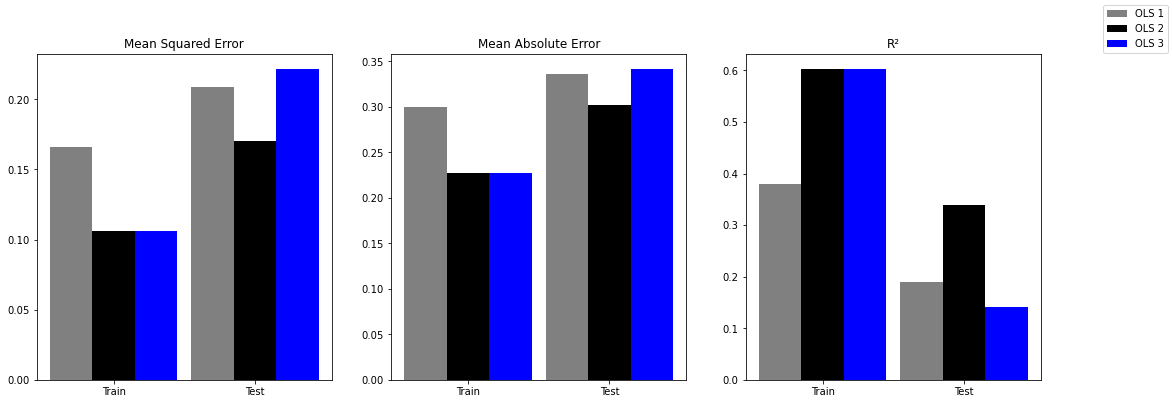

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
width = .3 # Bar width
for i in range(3):
    labs = [f"OLS {i}" for i in range(1, 4)] if i == 0 else ["" for _ in range(1, 4)]
    axs[i].bar(0, ols1_results["train"][i], width, label=labs[0], color="grey")
    axs[i].bar(0 + width, ols2_results["train"][i], width, label=labs[1], color="black")
    axs[i].bar(0 + 2 * width, ols3_results["train"][i], width, label=labs[2], color="blue")
    axs[i].bar(1, ols1_results["test"][i], width, color="grey")
    axs[i].bar(1 + width, ols2_results["test"][i], width, color="black")
    axs[i].bar(1 + 2 * width, ols3_results["test"][i], width, color="blue")
# Plot titles
axs[0].set_title("Mean Squared Error")
axs[1].set_title("Mean Absolute Error")
axs[2].set_title("R²")
# Labels and legend
for ax in axs:
    ax.set_xticks([width, width + 1], ["Train", "Test"])
fig.legend()

In [46]:
from sklearn.model_selection import cross_val_score # cross-validation function

In [47]:
# cv = 5, implies that we use 5 folds, the function will return 
# the negative mean absolute error for each fold, so we have to take its 
# negative value again to obtain the MAE
mae_cv = -cross_val_score(ols1_t, Xtrain, ytrain, cv=5, scoring="neg_mean_absolute_error")
print(f"Cross-validation mean absolute error: {np.mean(mae_cv):.2f} (± {np.std(mae_cv)/np.sqrt(5):.2f})") 

Cross-validation mean absolute error: 0.31 (± 0.01)


In [48]:
# Create lists to keep track of the results
mae_mean_list = []
mae_se_list = []
# Instantiate a LinearRegression model
ols_cv = LinearRegression()
# Loop over the polynomials
for p in range(1, 10):
    
    # Compute polynomials
    poly = PolynomialFeatures(p, include_bias=False)
    X_cv = poly.fit_transform(Xtrain_s)
    X_cv = np.apply_along_axis(standardize,0, X_cv)
    
    # Run cross-validation
    mae_cv = -cross_val_score(ols_cv, X_cv, ytrain, cv=5, scoring="neg_mean_absolute_error")
    
    # Store the mean and s.e. of the 5-folds
    mae_mean_list.append(np.mean(mae_cv))
    mae_se_list.append(np.std(mae_cv) / np.sqrt(5))

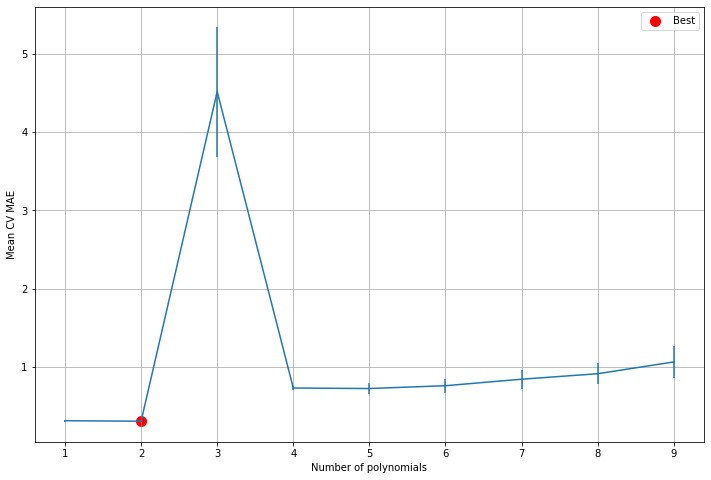

In [49]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
# Errorbar plot of mean MAE and standard error of the mean MAE
ax.errorbar(range(1, 10), mae_mean_list, yerr=mae_se_list)
# Single red dot for best result
best = np.argmin(mae_mean_list)
ax.scatter(best+1, mae_mean_list[best], color="red", s=100, label="Best")
# Add labels, ticks, legend, grid
ax.set_xlabel("Number of polynomials")
ax.set_ylabel("Mean CV MAE")
ax.legend()
ax.grid(True)
ax.set_xticks(range(1, 10), range(1, 10))

In [50]:
# Define model
ols_best = LinearRegression()
# Compute polynomials
poly_best = PolynomialFeatures(2, include_bias=False)

Xtrain_best = poly_best.fit_transform(Xtrain_s)
Xtrain_best = np.apply_along_axis(standardize,0, Xtrain_best)

Xtest_best = poly_best.fit_transform(Xtest_s)
Xtest_best = np.apply_along_axis(standardize,0, Xtest_best)

# Fit model
ols_best.fit(Xtrain_best, ytrain)
# OLS with 9 features
ols_best_results = {
    "train": [f(ols_best, Xtrain_best, ytrain) for f in [compute_mse, compute_mae, compute_r2]],
    "test": [f(ols_best, Xtest_best, ytest) for f in [compute_mse, compute_mae, compute_r2]]
}

print("ols_best_results: train: ", ols_best_results["train"])
print("\nols_best_results: test: ", ols_best_results["test"])

ols_best_results: train:  [0.10629814091509088, 0.22757917102346606, 0.6023522148331746]

ols_best_results: test:  [0.22147699466846132, 0.34149362632118924, 0.14058765788070393]
